In [1]:
import cudf
import pandas as pd
from time import time
import matplotlib.pyplot as plt
from statistics import mean

import numpy as np

In [2]:
results = {
    "cpu": {},
    "gpu": {}
}

## Scale 1

### I/O Operations

#### CPU

In [3]:
results['cpu']['x1'] = {}

In [4]:
results['cpu']['x1']["io_opt"] = {}

start = time()
cpu_df = pd.read_csv("../data/raw/online_retail_II.csv")
end = time()

results["cpu"]["x1"]["io_opt"]["load_csv"] = end-start

In [5]:
start = time()
cpu_df.info()
end = time()

results["cpu"]["x1"]["io_opt"]["info"] = end-start

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [6]:
start = time()
cpu_df.describe(include="O")
end = time()

results["cpu"]["x1"]["io_opt"]["describe"] = end-start

#### GPU

In [7]:
results['gpu']['x1'] = {}

In [8]:
results['gpu']['x1']["io_opt"] = {}

start = time()
gpu_df = cudf.read_csv("../data/raw/online_retail_II.csv")
end = time()

results["gpu"]["x1"]["io_opt"]["load_csv"] = end-start

In [9]:
start = time()
gpu_df.info()
end = time()

results["gpu"]["x1"]["io_opt"]["info"] = end-start

<class 'cudf.core.dataframe.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype
---  ------       --------------    -----
 0   Invoice      1067371 non-null  object
 1   StockCode    1067371 non-null  object
 2   Description  1062989 non-null  object
 3   Quantity     1067371 non-null  int64
 4   InvoiceDate  1067371 non-null  object
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object
dtypes: float64(2), int64(1), object(5)
memory usage: 116.4+ MB


In [10]:
start = time()
gpu_df.describe(include="O")
end = time()

results["gpu"]["x1"]["io_opt"]["describe"] = end-start

### Queries

#### CPU

In [11]:
results['cpu']['x1']["queries"] = {}

In [12]:
start = time()
cpu_df.groupby("Country").Price.sum()
end = time()

results["cpu"]["x1"]["queries"]["q1"] = end-start

In [13]:
start = time()
cpu_df.groupby("Invoice").Price.sum()
end = time()

results["cpu"]["x1"]["queries"]["q2"] = end-start

#### GPU

In [14]:
results['gpu']['x1']["queries"] = {}

In [15]:
start = time()
gpu_df.groupby("Country").Price.sum()
end = time()

results["gpu"]["x1"]["queries"]["q1"] = end-start

In [16]:
start = time()
gpu_df.groupby("Invoice").Price.sum()
end = time()

results["gpu"]["x1"]["queries"]["q2"] = end-start

## Scale x10

### I/O operations

#### CPU

In [17]:
results['cpu']['x10'] = {}

In [18]:
results['cpu']['x10']["io_opt"] = {}

start = time()
cpu_df = pd.read_csv("../data/raw/online_retail_II_x10.csv")
end = time()

results["cpu"]["x10"]["io_opt"]["load_csv"] = end-start

In [19]:
start = time()
cpu_df.info()
end = time()

results["cpu"]["x10"]["io_opt"]["info"] = end-start

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10673710 entries, 0 to 10673709
Data columns (total 8 columns):
 #   Column       Dtype  
---  ------       -----  
 0   Invoice      object 
 1   StockCode    object 
 2   Description  object 
 3   Quantity     int64  
 4   InvoiceDate  object 
 5   Price        float64
 6   Customer ID  float64
 7   Country      object 
dtypes: float64(2), int64(1), object(5)
memory usage: 651.5+ MB


In [20]:
start = time()
cpu_df.describe(include="O")
end = time()

results["cpu"]["x10"]["io_opt"]["describe"] = end-start

#### GPU

In [21]:
results['gpu']['x10'] = {}

In [24]:
results['gpu']['x10']["io_opt"] = {}

start = time()
gpu_df = cudf.read_csv("../data/raw/online_retail_II_x10.csv")
end = time()

results["gpu"]["x10"]["io_opt"]["load_csv"] = end-start

In [25]:
start = time()
gpu_df.info()
end = time()

results["gpu"]["x10"]["io_opt"]["info"] = end-start

<class 'cudf.core.dataframe.DataFrame'>
RangeIndex: 10673710 entries, 0 to 10673709
Data columns (total 8 columns):
 #   Column       Dtype
---  ------       -----
 0   Invoice      object
 1   StockCode    object
 2   Description  object
 3   Quantity     int64
 4   InvoiceDate  object
 5   Price        float64
 6   Customer ID  float64
 7   Country      object
dtypes: float64(2), int64(1), object(5)
memory usage: 1.1+ GB


In [26]:
start = time()
gpu_df.describe(include="O")
end = time()

results["gpu"]["x10"]["io_opt"]["describe"] = end-start

### Queries

#### CPU

In [27]:
results['cpu']['x10']["queries"] = {}

In [28]:
start = time()
cpu_df.groupby("Country").Price.sum()
end = time()

results["cpu"]["x10"]["queries"]["q1"] = end-start

In [29]:
start = time()
cpu_df.groupby("Invoice").Price.sum()
end = time()

results["cpu"]["x10"]["queries"]["q2"] = end-start

#### GPU

In [30]:
results['gpu']['x10']["queries"] = {}

In [31]:
start = time()
gpu_df.groupby("Country").Price.sum()
end = time()

results["gpu"]["x10"]["queries"]["q1"] = end-start

In [32]:
start = time()
gpu_df.groupby("Invoice").Price.sum()
end = time()

results["gpu"]["x10"]["queries"]["q2"] = end-start

## Scale x0.1

### I/O operations

#### CPU

In [33]:
results['cpu']['x0.1'] = {}

In [53]:
results['cpu']['x0.1']["io_opt"] = {}

start = time()
cpu_df = pd.read_csv("../data/raw/online_retail_II_x0_1.csv")
end = time()

results["cpu"]["x0.1"]["io_opt"]["load_csv"] = end-start

In [35]:
start = time()
cpu_df.info()
end = time()

results["cpu"]["x0.1"]["io_opt"]["info"] = end-start

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      100000 non-null  object 
 1   StockCode    100000 non-null  object 
 2   Description  99130 non-null   object 
 3   Quantity     100000 non-null  int64  
 4   InvoiceDate  100000 non-null  object 
 5   Price        100000 non-null  float64
 6   Customer ID  72861 non-null   float64
 7   Country      100000 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 6.1+ MB


In [36]:
start = time()
cpu_df.describe(include="O")
end = time()

results["cpu"]["x0.1"]["io_opt"]["describe"] = end-start

#### GPU

In [37]:
results['gpu']["x0.1"] = {}

In [38]:
results['gpu']["x0.1"]["io_opt"] = {}

start = time()
gpu_df = cudf.read_csv("../data/raw/online_retail_II_x0_1.csv")
end = time()

results["gpu"]["x0.1"]["io_opt"]["load_csv"] = end-start

In [39]:
start = time()
gpu_df.info()
end = time()

results["gpu"]["x0.1"]["io_opt"]["info"] = end-start

<class 'cudf.core.dataframe.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype
---  ------       --------------   -----
 0   Invoice      100000 non-null  object
 1   StockCode    100000 non-null  object
 2   Description  99130 non-null   object
 3   Quantity     100000 non-null  int64
 4   InvoiceDate  100000 non-null  object
 5   Price        100000 non-null  float64
 6   Customer ID  72861 non-null   float64
 7   Country      100000 non-null  object
dtypes: float64(2), int64(1), object(5)
memory usage: 10.9+ MB


In [40]:
start = time()
gpu_df.describe(include="O")
end = time()

results["gpu"]["x0.1"]["io_opt"]["describe"] = end-start

### Queries

#### CPU

In [41]:
results['cpu']['x0.1']["queries"] = {}

In [42]:
start = time()
cpu_df.groupby("Country").Price.sum()
end = time()

results["cpu"]["x0.1"]["queries"]["q1"] = end-start

In [43]:
start = time()
cpu_df.groupby("Invoice").Price.sum()
end = time()

results["cpu"]["x0.1"]["queries"]["q2"] = end-start

#### GPU

In [44]:
results['gpu']['x0.1']["queries"] = {}

In [45]:
start = time()
gpu_df.groupby("Country").Price.sum()
end = time()

results["gpu"]["x0.1"]["queries"]["q1"] = end-start

In [46]:
start = time()
gpu_df.groupby("Invoice").Price.sum()
end = time()

results["gpu"]["x0.1"]["queries"]["q2"] = end-start

## Plots

In [47]:
def plot(cpu_io, gpu_io, cpu_queries, gpu_queries):
    # PLOT 1
    labels = ['Load\ndataset', '.info()', '.describe()']
    # cpu_values = [i[1] for i in results["cpu"]["x1"]["io_opt"].items()]
    # gpu_values = [i[1] for i in results["gpu"]["x1"]["io_opt"].items()]

    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    ax1 = plt.subplot(1, 2, 1)
    ax1.bar(x - width/2, cpu_io, width, label='CPU')
    ax1.bar(x + width/2, gpu_io, width, label='GPU')

    ax1.set_ylabel('seconds')
    ax1.set_title('I/O operations by time')
    ax1.set_xticks(x)
    ax1.set_xticklabels(labels)
    ax1.legend()

    # PLOT 2
    labels = ['Q1', 'Q2']
    # cpu_queries = [i[1] for i in results["cpu"]["x1"]["queries"].items()]
    # gpu_queries = [i[1] for i in results["gpu"]["x1"]["queries"].items()]

    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    ax2 = plt.subplot(1, 2, 2)
    ax2.bar(x - width/2, cpu_queries, width, label='CPU')
    ax2.bar(x + width/2, gpu_queries, width, label='GPU')

    ax2.set_ylabel('seconds')
    ax2.set_title('Queries by time')
    ax2.set_xticks(x)
    ax2.set_xticklabels(labels)
    ax2.legend()

    plt.show()

### Scale 1 results

In [48]:
print(results)

{'cpu': {'x1': {'io_opt': {'load_csv': 0.6064379215240479, 'info': 0.10498738288879395, 'describe': 0.36641407012939453}, 'queries': {'q1': 0.05308842658996582, 'q2': 0.07305502891540527}}, 'x10': {'io_opt': {'load_csv': 5.95487642288208, 'info': 0.004050493240356445, 'describe': 3.437549352645874}, 'queries': {'q1': 0.4261815547943115, 'q2': 0.41337132453918457}}, 'x0.1': {'io_opt': {'load_csv': -1.315638780593872, 'info': 0.03019881248474121, 'describe': 0.05685114860534668}, 'queries': {'q1': 0.012850522994995117, 'q2': 0.014202594757080078}}}, 'gpu': {'x1': {'io_opt': {'load_csv': 0.6453456878662109, 'info': 0.007930517196655273, 'describe': 0.38254857063293457}, 'queries': {'q1': 0.00872182846069336, 'q2': 0.0077419281005859375}}, 'x10': {'io_opt': {'load_csv': 0.508018970489502, 'info': 0.003490924835205078, 'describe': 2.862375259399414}, 'queries': {'q1': 0.03486967086791992, 'q2': 0.0119476318359375}}, 'x0.1': {'io_opt': {'load_csv': 0.03344368934631348, 'info': 0.006281375885

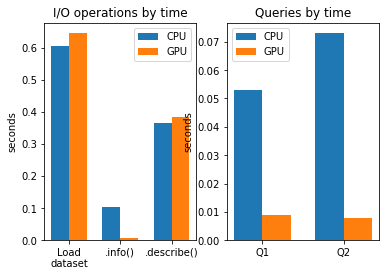

In [49]:
plot(
    [i[1] for i in results["cpu"]["x1"]["io_opt"].items()],
    [i[1] for i in results["gpu"]["x1"]["io_opt"].items()],
    [i[1] for i in results["cpu"]["x1"]["queries"].items()],
    [i[1] for i in results["gpu"]["x1"]["queries"].items()]
)

### Scale 10 results

0.004050493240356445 0.003490924835205078


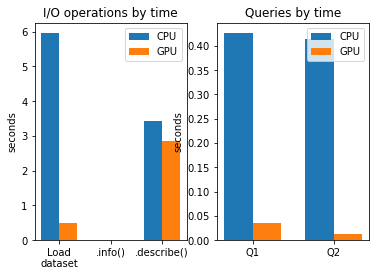

In [56]:
plot(
    [i[1] for i in results["cpu"]["x10"]["io_opt"].items()],
    [i[1] for i in results["gpu"]["x10"]["io_opt"].items()],
    [i[1] for i in results["cpu"]["x10"]["queries"].items()],
    [i[1] for i in results["gpu"]["x10"]["queries"].items()]
)

### Scale 0.1 results

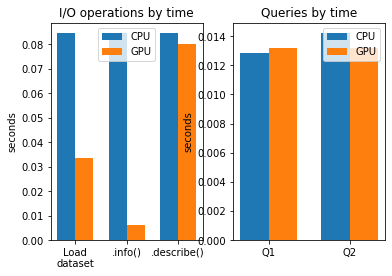

In [54]:
plot(
    [i[1] for i in results["cpu"]["x0.1"]["io_opt"].items()],
    [i[1] for i in results["gpu"]["x0.1"]["io_opt"].items()],
    [i[1] for i in results["cpu"]["x0.1"]["queries"].items()],
    [i[1] for i in results["gpu"]["x0.1"]["queries"].items()]
)

### CPU & CPU comparison

[0.013526558876037598, 0.06307172775268555, 0.41977643966674805]
[0.0132066011428833, 0.008231878280639648, 0.02340865135192871]


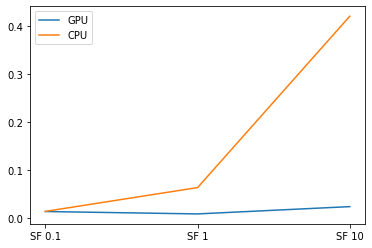

In [55]:
cpu = [ 
    mean([ i[1] for i in results["cpu"]["x0.1"]["queries"].items()]),
    mean([ i[1] for i in results["cpu"]["x1"]["queries"].items()]),
    mean([ i[1] for i in results["cpu"]["x10"]["queries"].items()])
]

print(cpu)

gpu = [ 
    mean([ i[1] for i in results["gpu"]["x0.1"]["queries"].items()]),
    mean([ i[1] for i in results["gpu"]["x1"]["queries"].items()]),
    mean([ i[1] for i in results["gpu"]["x10"]["queries"].items()])
]

print(gpu)

activity = ["SF 0.1", "SF 1", "SF 10"]

fig, ax = plt.subplots()
ax.plot(activity, gpu, label="GPU")
ax.plot(activity, cpu, label="CPU")
ax.legend()

plt.show()